# <span style="color:#336699">simplecube - An simple python package for creating satellite image data cubes based on Brazil Data Cube </span>
<hr style="border:2px solid #0077b9;">

<div style="text-align: left;">
    <a href="https://nbviewer.jupyter.org/github/brazil-data-cube/code-gallery/"><img src="https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg" align="center"/></a>
</div>

<br/>

<div style="text-align: center;font-size: 90%;">
    Gabriel Sansigolo<sup><a href="https://orcid.org/0000-0003-0789-5858"><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup>
    <br/><br/>
    Earth Observation and Geoinformatics Division, National Institute for Space Research (INPE)
    <br/>
    Avenida dos Astronautas, 1758, Jardim da Granja, São José dos Campos, SP 12227-010, Brazil
    <br/><br/>
    Contact: <a href="mailto:gabriel.sansigolo@inpe.br">gabriel.sansigolo@inpe.br</a>
    <br/><br/>
    Last Update: June 15, 2024
</div>

<br/>


In [1]:
#!pip install git+https://github.com/GSansigolo/simplecube

In [2]:
from simplecube import hls_simple_cube, get_timeseries_datacube
from pyproj import Transformer
import os

In [3]:
path_dir = os.path.abspath("")

In [4]:
cube = hls_simple_cube(
    data_dir=os.path.join(path_dir,'S30/B04/')
)

cube

<xarray.Dataset> Size: 3GB
Dimensions:      (band: 1, x: 3660, y: 3660, time: 58)
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 29kB 6e+05 6e+05 6.001e+05 ... 7.098e+05 7.098e+05
  * y            (y) float64 29kB -3.2e+06 -3.2e+06 ... -3.31e+06 -3.31e+06
    spatial_ref  int64 8B 0
  * time         (time) datetime64[ns] 464B 2024-01-05T13:38:31 ... 2024-12-3...
Data variables:
    band_data    (time, band, y, x) float32 3GB 0.0571 0.0862 ... 0.0374 0.0354

In [21]:
transformer = Transformer.from_crs("EPSG:4326","EPSG:32621")
point = transformer.transform(-55.60, -29.46)
point

(2208885.6336476645, -6511452.96379366)

In [22]:
ts_nir = get_timeseries_datacube(
    cube=cube, 
    geom=[dict(coordinates = [point[0], point[1]])],
)

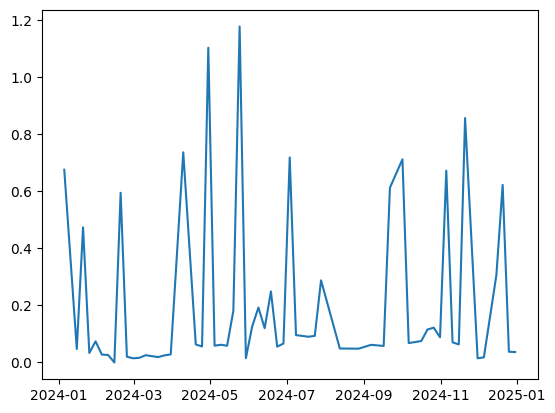

In [24]:
import matplotlib.pyplot as plt

plt.plot(ts_nir['timeline'], ts_nir['values'],)